In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams.update({'font.size' : 18})


n =64
L = 30
dx =L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) #Analytic Derivative 

In [4]:
## Approximate derivative using finite difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx

dfFD[-1] = dfFD[-2]

\begin{equation}
\begin{array}{rcl}
   \mathcal{F}\left(\frac{df}{dx}\right) &=&  i\kappa\mathcal{F}\left(f\right) \newline
    & = &i \kappa\hat{f} \newline
    & = &
    \left(
    \begin{array}{c}
        k_1 f_1 \newline
        k_2 f_2 \newline
        k_3 f_3 \newline
        \vdots
    \end{array}
    \right)
\end{array}
\end{equation}

$\kappa$ is spatial freq.
$\omega$ is temporal freq.

In [16]:
## Derivative using FFT
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa)
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))

C:\Users\dnrd9\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


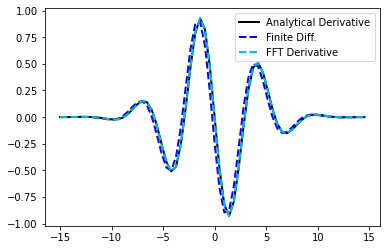

In [17]:
## plot
plt.plot(x,df.real,color='k',linewidth=2,label='Analytical Derivative')
plt.plot(x,dfFD.real,'--',color='b',linewidth=2,label='Finite Diff.')
plt.plot(x,dfFFT.real,'--',color='c',linewidth=2,label='FFT Derivative')
plt.legend()
plt.show()
